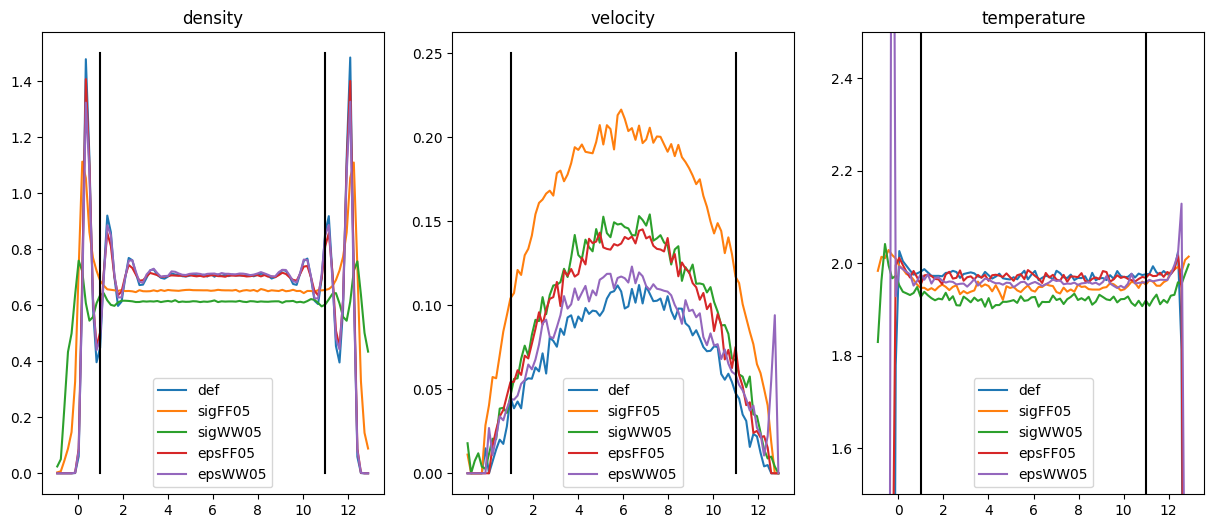

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Function to somewhat clean up the spiking action going on at the walls, only used for velocity
def cleanSpikes(arr,diff,replace):
    newz = []
    for i,coord in enumerate(arr):
        if(i==0):
            newz.append(coord)
            continue
        if(np.abs(coord-newz[-1]) > diff or coord<0):
            newz.append(replace)
        else: newz.append(coord)
    return newz

def getTable(file):
    table = pd.read_csv(file,delimiter=" ",header=None,names=["pos_z","density","velocity","temperature"])
    table["pos_z"] = table["pos_z"]-2.9
    mask = table["pos_z"] > -1
    table["pos_z"] = table["pos_z"][mask]
    table["density"] = table["density"][mask]
    table["velocity"] = table["velocity"][mask]
    table["temperature"] = table["temperature"][mask]
    return table

def plot(ax,file):
    table = getTable(f'../Tests/{file}.dat')
    ax[0].plot(table["pos_z"],table["density"],label=file)
    ax[0].set_title("density")
    ax[0].legend()

    ax[1].plot(table["pos_z"],cleanSpikes(table["velocity"],0.05,0),label=file)
    ax[1].set_title("velocity")
    ax[1].legend()

    ax[2].plot(table["pos_z"],table["temperature"],label=file)
    ax[2].set_title("temperature")
    ax[2].set_ylim(1.5,2.5)
    ax[2].legend()

def setWalls(ax):
    ax[0].plot([1,1],[0,1.5],c="k")
    ax[0].plot([11,11],[0,1.5],c="k")
    ax[1].plot([1,1],[0,0.25],c="k")
    ax[1].plot([11,11],[0,0.25],c="k")
    ax[2].plot([1,1],[0,2.5],c="k")
    ax[2].plot([11,11],[0,2.5],c="k")

fig,ax = plt.subplots(1,3,sharex=False,figsize=(15,6))

plot(ax,"def")
plot(ax,"sigFF05")
plot(ax,"sigWW05")
plot(ax,"epsFF05")
plot(ax,"epsWW05")

setWalls(ax)